# Agentic Regression

The point of this exercise was to see if agents can generate and run machine learning code based on a simple setup prompt and input task. 

## Setup

### Import libraries


In [18]:
import os
from pathlib import Path
import pprint

from autogen import AssistantAgent, UserProxyAgent, GroupChatManager, GroupChat,ConversableAgent
from autogen.coding import DockerCommandLineCodeExecutor, LocalCommandLineCodeExecutor



### Environment Setup

In [19]:
# Temporary directory for the agents to store generate code

work_dir = Path("generated_code")
work_dir.mkdir(exist_ok=True)

#### LLM Configuration: We are using Llama3 in this case

In [20]:
model = "llama3:latest"
termination_msg = "TERMINATE"

config_list = [
    {
        "model": model,
        "base_url": "http://localhost:11434/v1",
        "api_key": "ollama", # required, but not used,
    }
]

agent_config = {"config_list": config_list, "cache_seed": 42}



#### Prompts and Agent definition

In [21]:
local_code_executor = LocalCommandLineCodeExecutor(
    work_dir=work_dir
)

code_executor_agent = AssistantAgent(
    name="code_executor_agent",
    llm_config=False,
    code_execution_config={"executor": local_code_executor}, # change to docker_code_executor to use docker
    human_input_mode="NEVER",
)

In [22]:
# Agent that will initiate the conversation and run the code

executor = UserProxyAgent(
    name="Executor",
    system_message="Executor. Execute the code written by the engineer.",
    human_input_mode="NEVER",
    code_execution_config={ "work_dir": work_dir},
)

In [23]:
code_writer_system_message = """
Please provide Python or shell script solutions to solve the user's tasks, which the user can execute by simply running the code. Each solution should be placed inside a code block with the first line reserved for a comment including the filename. Do not ask the user to modify the code or copy and paste results; instead, use the `print` function for output when relevant.
1. Gather information: Write a script that outputs necessary information such as browsing/searching the web, downloading/reading a file, printing the content of a webpage or file, getting the current date/time, or checking the operating system. After displaying sufficient information to solve the task based on language skills, you may stop the code and solve the remaining task yourself. 
2. Perform a task: Write an executable script to solve the given task and output the result. If necessary, break down the problem into steps with clear explanations of which steps involve coding and which steps require language skills. Do not ask the user to modify the code or provide feedback; the code should be ready for execution.
3. When writing an executable script, always begin with a code block and do not use escape characters or leading spaces if not required.
Please provide one code block per response to allow the user to easily execute each solution.
Here are some examples of a code block with a filename comment:
```python
# filename: script_one.py
print("Hello, World!")
```
```sh
# filename: script_two.sh
printf "Hello, World!"
```
"""



code_writer_agent = ConversableAgent(
    name="code_writer_agent",
    system_message=code_writer_system_message,
    llm_config={"config_list": config_list, "cache_seed": None, "temperature":0.0, "seed": 52},
    code_execution_config=False, # turn off code execution for this agent
    max_consecutive_auto_reply=2,
    human_input_mode="NEVER",
)

In [26]:
# Start the Chat!
task = """Write Python code to perform 3 class logistic regression on the iris dataset using sklearn. Create a plot to show outcomes and on the same figure plot the decision boundaries of the classifier,  the datapoints are colored according to their labels."""

chat_result = code_executor_agent.initiate_chat(
        code_writer_agent,
        message=task,
        clear_history=True,
    )




code_executor_agent (to code_writer_agent):

Write Python code to perform 3 class logistic regression on the iris dataset using sklearn. Create a plot to show outcomes and on the same figure plot the decision boundaries of the classifier,  the datapoints are colored according to their labels.

--------------------------------------------------------------------------------
code_writer_agent (to code_executor_agent):

# filename: iris_logistic_regression.py

```Python
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

# Load the iris dataset
iris = load_iris()
X = iris.data[:, :2]  # we only take the first two features.
y = iris.target

# Train/Test Split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.5, random_state=42)

# Logistic Regres

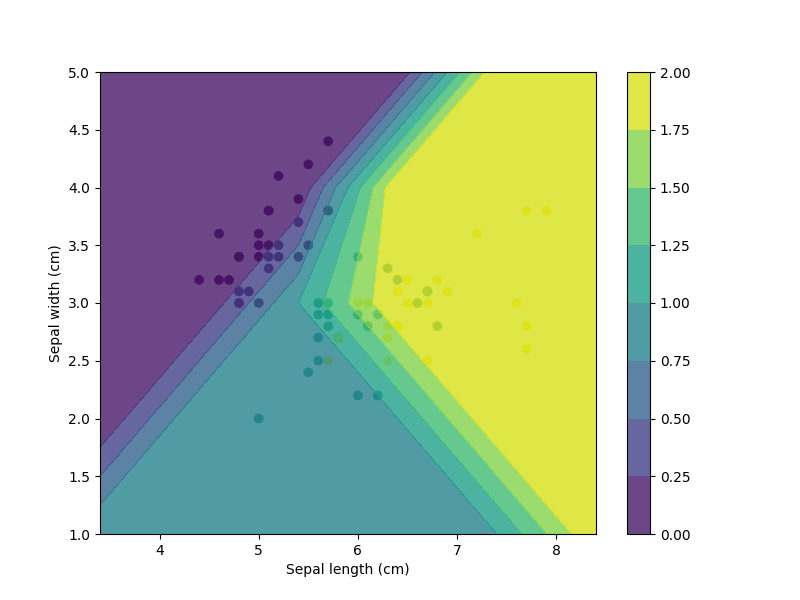

In [6]:
from IPython.display import Image
Image(filename="generated_code/logistic_reg_decision_boundaries.png") 
